

# **Chapter3: Processes**

## **3.1 Fork Operation and Memory**

Question: Using the program shown in Figure 3.30, explain what the output will be at LINE A.



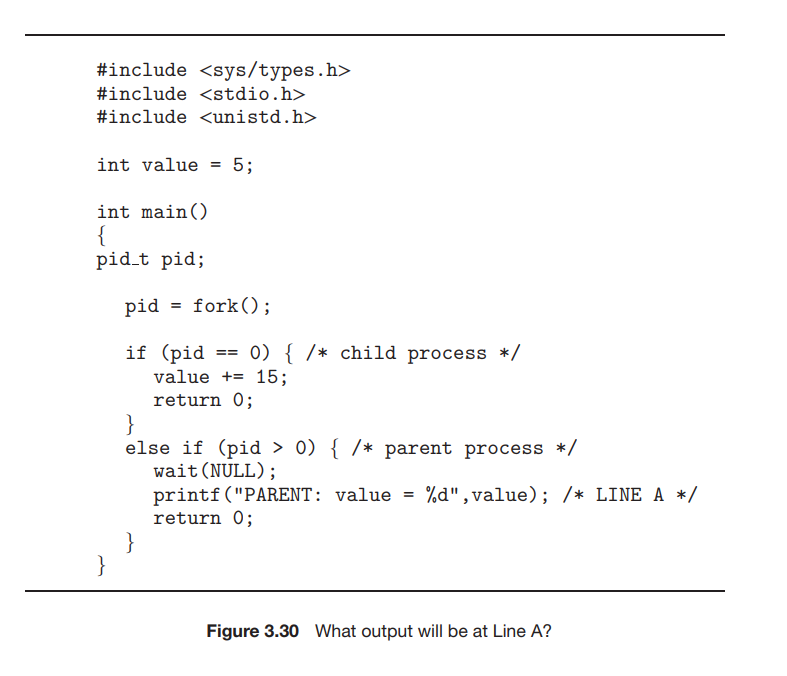










Answer: The output at LINE A will be "PARENT: value = 5". This is because the child process updates its own copy of the variable `value`. When control returns to the parent process, its instance of `value` remains unchanged at 5.














## **3.2 Number of Processes Created**

Question: Including the initial parent process, how many processes are created by the program shown in Figure 3.31?




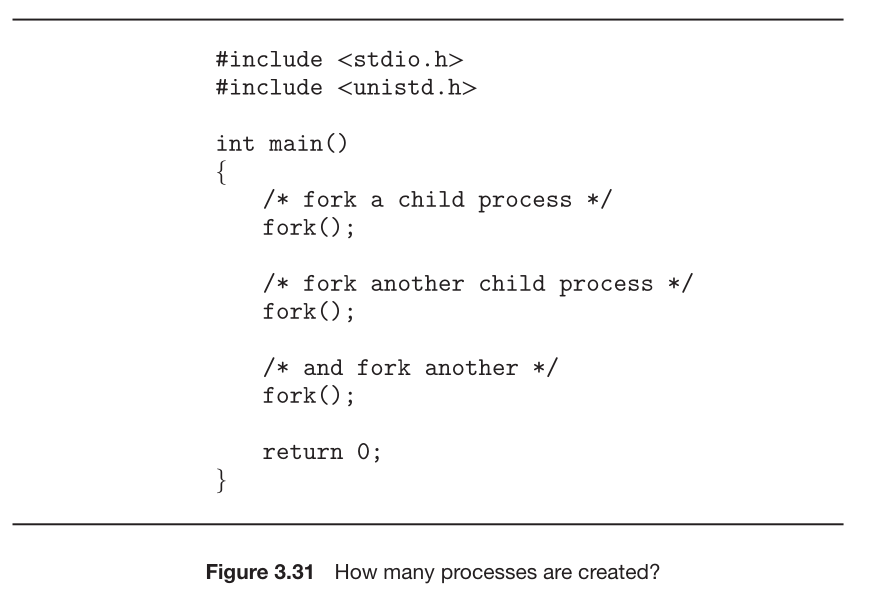









Answer: Including the initial parent process, a total of eight processes are created.

## **3.3 Complications of Concurrent Processing**

Question: Original versions of Apple’s mobile iOS operating system provided no means of concurrent processing. Discuss three major complications that concurrent processing adds to an operating system.

Answer:
a. The CPU scheduler must be aware of the different concurrent processes and must choose an appropriate algorithm for scheduling them.
b. Concurrent processes often need to communicate with one another, requiring the operating system to provide methods for interprocess communication.
c. With limited memory on devices, poor memory management by one process can negatively impact others, so the OS must carefully manage memory to support multiple concurrent processes.

## **3.4 Context Switching with Multiple Register Sets**

Question: Some computer systems provide multiple register sets. Describe what happens when a context switch occurs if the new context is already loaded into one of the register sets. What happens if the new context is in memory rather than in a register set and all the register sets are in use?

Answer: If the new context is already loaded in a register set, the CPU's current-register-set pointer is simply changed to point to that set, which is very fast. If the new context is in memory and all register sets are in use, one context from a register set must be selected and moved to memory (victim selection), and then the new context is loaded from memory into that vacated register set. This process takes more time than a simple pointer change.

## **3.5 Shared Process Memory after fork()**

Question: When a process creates a new process using the `fork()` operation, which of the following states is shared between the parent process and the child process?
a. Stack
b. Heap
c. Shared memory segments

Answer: Only the shared memory segments are shared between the parent process and the newly forked child process. Copies of the stack and the heap are made for the newly created process.

## **3.6 "Exactly Once" RPC Semantics with Lost ACK**

Question: Consider the “exactly once” semantic with respect to the RPC mechanism. Does the algorithm for implementing this semantic execute correctly even if the ACK message sent back to the client is lost due to a network problem? Describe the sequence of messages, and discuss whether “exactly once” is still preserved.

Answer: Yes, "exactly once" is still preserved. The client sends an RPC with a timestamp and starts a timer. If the ACK is lost, the client times out and resends the RPC with a new timestamp. When the server receives this duplicate RPC, it uses the timestamp to identify it as a duplicate, does not re-execute the procedure, and resends the ACK. This sequence ensures the remote procedure is executed exactly once.

## **3.7 Guaranteeing "Exactly Once" with Server Failures**

Question: Assume that a distributed system is susceptible to server failure. What mechanisms would be required to guarantee the “exactly once” semantic for execution of RPCs?

Answer: To guarantee "exactly once" semantics with server failures, the server must keep track of all received RPC operations in stable storage (like a disk log). This log would record whether each RPC was successfully performed and its results. After a server crash and recovery, the server can consult this log to determine if an incoming RPC has already been processed, thus preventing duplicate execution.